<a href="https://colab.research.google.com/github/khushbooekhande/WildfireDetectionUsingMachineLearning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Initializing the CNN
classifier = Sequential()

#Step1: Convolution
classifier.add(Conv2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

#Step2: Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#Step3: Flattening
classifier.add(Flatten())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """


In [0]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

#Compiling the CNN:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [0]:
from keras.preprocessing.image import ImageDataGenerator


#Feeding the CNN model our image dataset.
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\anura\Desktop\Wildfire Dataset\CNN data\Combined Data\train',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\anura\Desktop\Wildfire Dataset\CNN data\Combined Data\test',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [0]:
from IPython.display import display
from PIL import Image


#Training the CNN model
classifier.fit_generator(
    training_set,
    steps_per_epoch = 500,
    epochs = 3,
    validation_data = test_set,
    validation_steps = 500)


Epoch 1/3
500/500 [==============================] - 219s 439ms/step - loss: 0.4491 - accuracy: 0.7678 - val_loss: 0.4326 - val_accuracy: 0.8002
Epoch 2/3
500/500 [==============================] - 218s 435ms/step - loss: 0.3360 - accuracy: 0.8399 - val_loss: 0.6649 - val_accuracy: 0.7202
Epoch 3/3
500/500 [==============================] - 224s 449ms/step - loss: 0.2766 - accuracy: 0.8729 - val_loss: 0.2682 - val_accuracy: 0.8072


In [0]:
def plot_image(img_array):
    img_array = image.load_img(img_array, 
                            target_size = (500,500))
    img = np.array(img_array, np.int32)
    plt.imshow(img)

In [0]:
import numpy as np
from keras.preprocessing import image


def image_test(image_array):
    test_image = image.load_img(image_array, 
                            target_size = (64,64))
    plot_image(image_array)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] >=0.5:
        prediction = 'fire'
    else:
        prediction = 'not fire'
    print(prediction)

fire


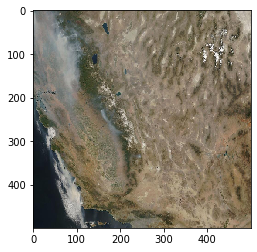

In [0]:
image_test(r'C:\Users\anura\Desktop\Wildfire Dataset\CNN data\Combined Data\1.jpg')